$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Práctica Calificada N°1}$$
    
_Nombre:_ _Ana Lucia Manrique De La Torre Ugarte_

_DNI:_ _73986743_




In [194]:
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/00505/qsar_aquatic_toxicity.csv -O qsar_aquatic_toxicity.csv

Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/00505/qsar_aquatic_toxicity.csv
To: /content/qsar_aquatic_toxicity.csv
100% 22.9k/22.9k [00:00<00:00, 583kB/s]


**Librerías**

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

**Cargamos la data**

**Agregar informacion de la paigna**

In [196]:
df = pd.read_csv("qsar_aquatic_toxicity.csv",sep=';')

# Análisis exploratorio de datos

In [197]:
df.head() #Visualiamos las primeras 5 lineas de la data

,0,0.1,0.2,2.419,1.225,0.667,0.3,0.4,3.740
0,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
1,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
2,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
3,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
4,215.34,327.629,3,0.189,4.677,1.333,0,4,6.064


No se aprecia un encabezado

In [198]:
#Añadimos fila de titulos al inicio del DataFrame
df.columns = ['TPSA(Tot)', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040', 'LC50 [-LOG(mol/L)]']
df.head()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50 [-LOG(mol/L)]
0,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
1,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
2,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
3,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
4,215.34,327.629,3,0.189,4.677,1.333,0,4,6.064


In [199]:
df.info() #Resumen de la informacion del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TPSA(Tot)           545 non-null    float64
 1   SAacc               545 non-null    float64
 2   H-050               545 non-null    int64  
 3   MLOGP               545 non-null    float64
 4   RDCHI               545 non-null    float64
 5   GATS1p              545 non-null    float64
 6   nN                  545 non-null    int64  
 7   C-040               545 non-null    int64  
 8   LC50 [-LOG(mol/L)]  545 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.4 KB


9 columnas cada una con 545 valores, no nulos, y de tipo float o int.

In [200]:
df.describe() #Estadisticas descriptivas de la data

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50 [-LOG(mol/L)]
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.00000,545.000000,545.000000,545.000000
mean,48.561872,58.977035,0.939450,2.313299,2.494624,1.04696,1.005505,0.354128,4.660106
std,46.760699,68.182392,1.619619,1.743392,0.809925,0.40372,1.397860,0.807426,1.666279
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.28100,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.228000,1.975000,0.73700,0.000000,0.000000,3.601000
50%,40.460000,42.683000,0.000000,2.273000,2.344000,1.02100,1.000000,0.000000,4.530000
75%,70.140000,77.727000,1.000000,3.395000,2.913000,1.26700,2.000000,0.000000,5.610000
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.50000,11.000000,11.000000,10.047000


**Verificamos presencia de outliers usando el Método Z-Score**

La presencia de valores atípicos puede conducir al desarrollo de un mal modelo de aprendizaje automático.

**agregar como funciona z-score**

In [201]:
z_scores = df.apply(lambda x: (x - x.mean()) / x.std())
outliers = (z_scores.abs() > 3).sum() # threshold = 3
outliers_cols = outliers[outliers > 0]

for col in outliers_cols.index:
    print(f"{col}: {outliers[col]}")
     

TPSA(Tot): 7
SAacc: 13
H-050: 9
MLOGP: 3
RDCHI: 6
GATS1p: 2
nN: 7
C-040: 6
LC50 [-LOG(mol/L)]: 2


Encontramos que hay presencia de outliers en todas las columnas.

**Visualizamos la distribución de outliers encontrados**

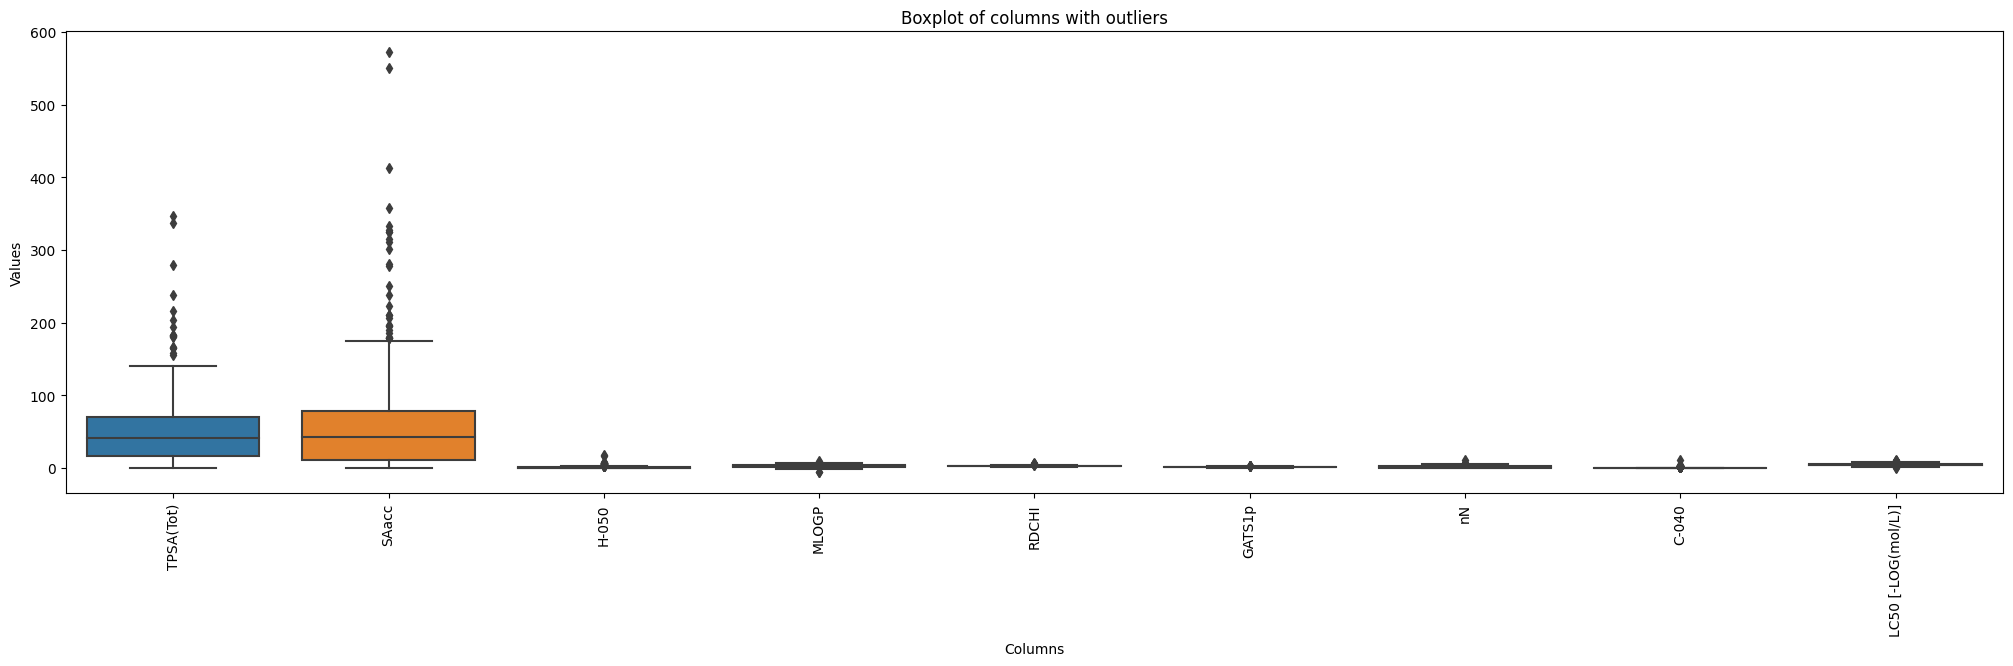

In [202]:
outliers_cols = outliers[outliers > 0].index.tolist()

df_outliers = df[outliers_cols]

fig, ax = plt.subplots(figsize=(25, 6))
sns.boxplot(data=df_outliers, ax=ax, orient='v')

ax.set_title("Boxplot of columns with outliers")
ax.set_xlabel("Columns")
ax.set_ylabel("Values")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

Este análisis se llevó a cabo para determinar el método para estandarizar/escalar los datos antes de entrenar el modelo: RobustScaler o StandardScaler.

Al identificar las columnas que contienen un gran número de outliers, es más apropiado utilizar RobustScaler para una normalización más robusta de los datos.



**Verificamos presencia de valores nulos**

In [203]:
df.isnull().sum()

TPSA(Tot)             0
SAacc                 0
H-050                 0
MLOGP                 0
RDCHI                 0
GATS1p                0
nN                    0
C-040                 0
LC50 [-LOG(mol/L)]    0
dtype: int64

No hay valores nulos en ninguna columna.

**Visualizamos distribución de la data**

Matriz de gráficos de dispersión para visualizar la relación entre múltiples variables numéricas.

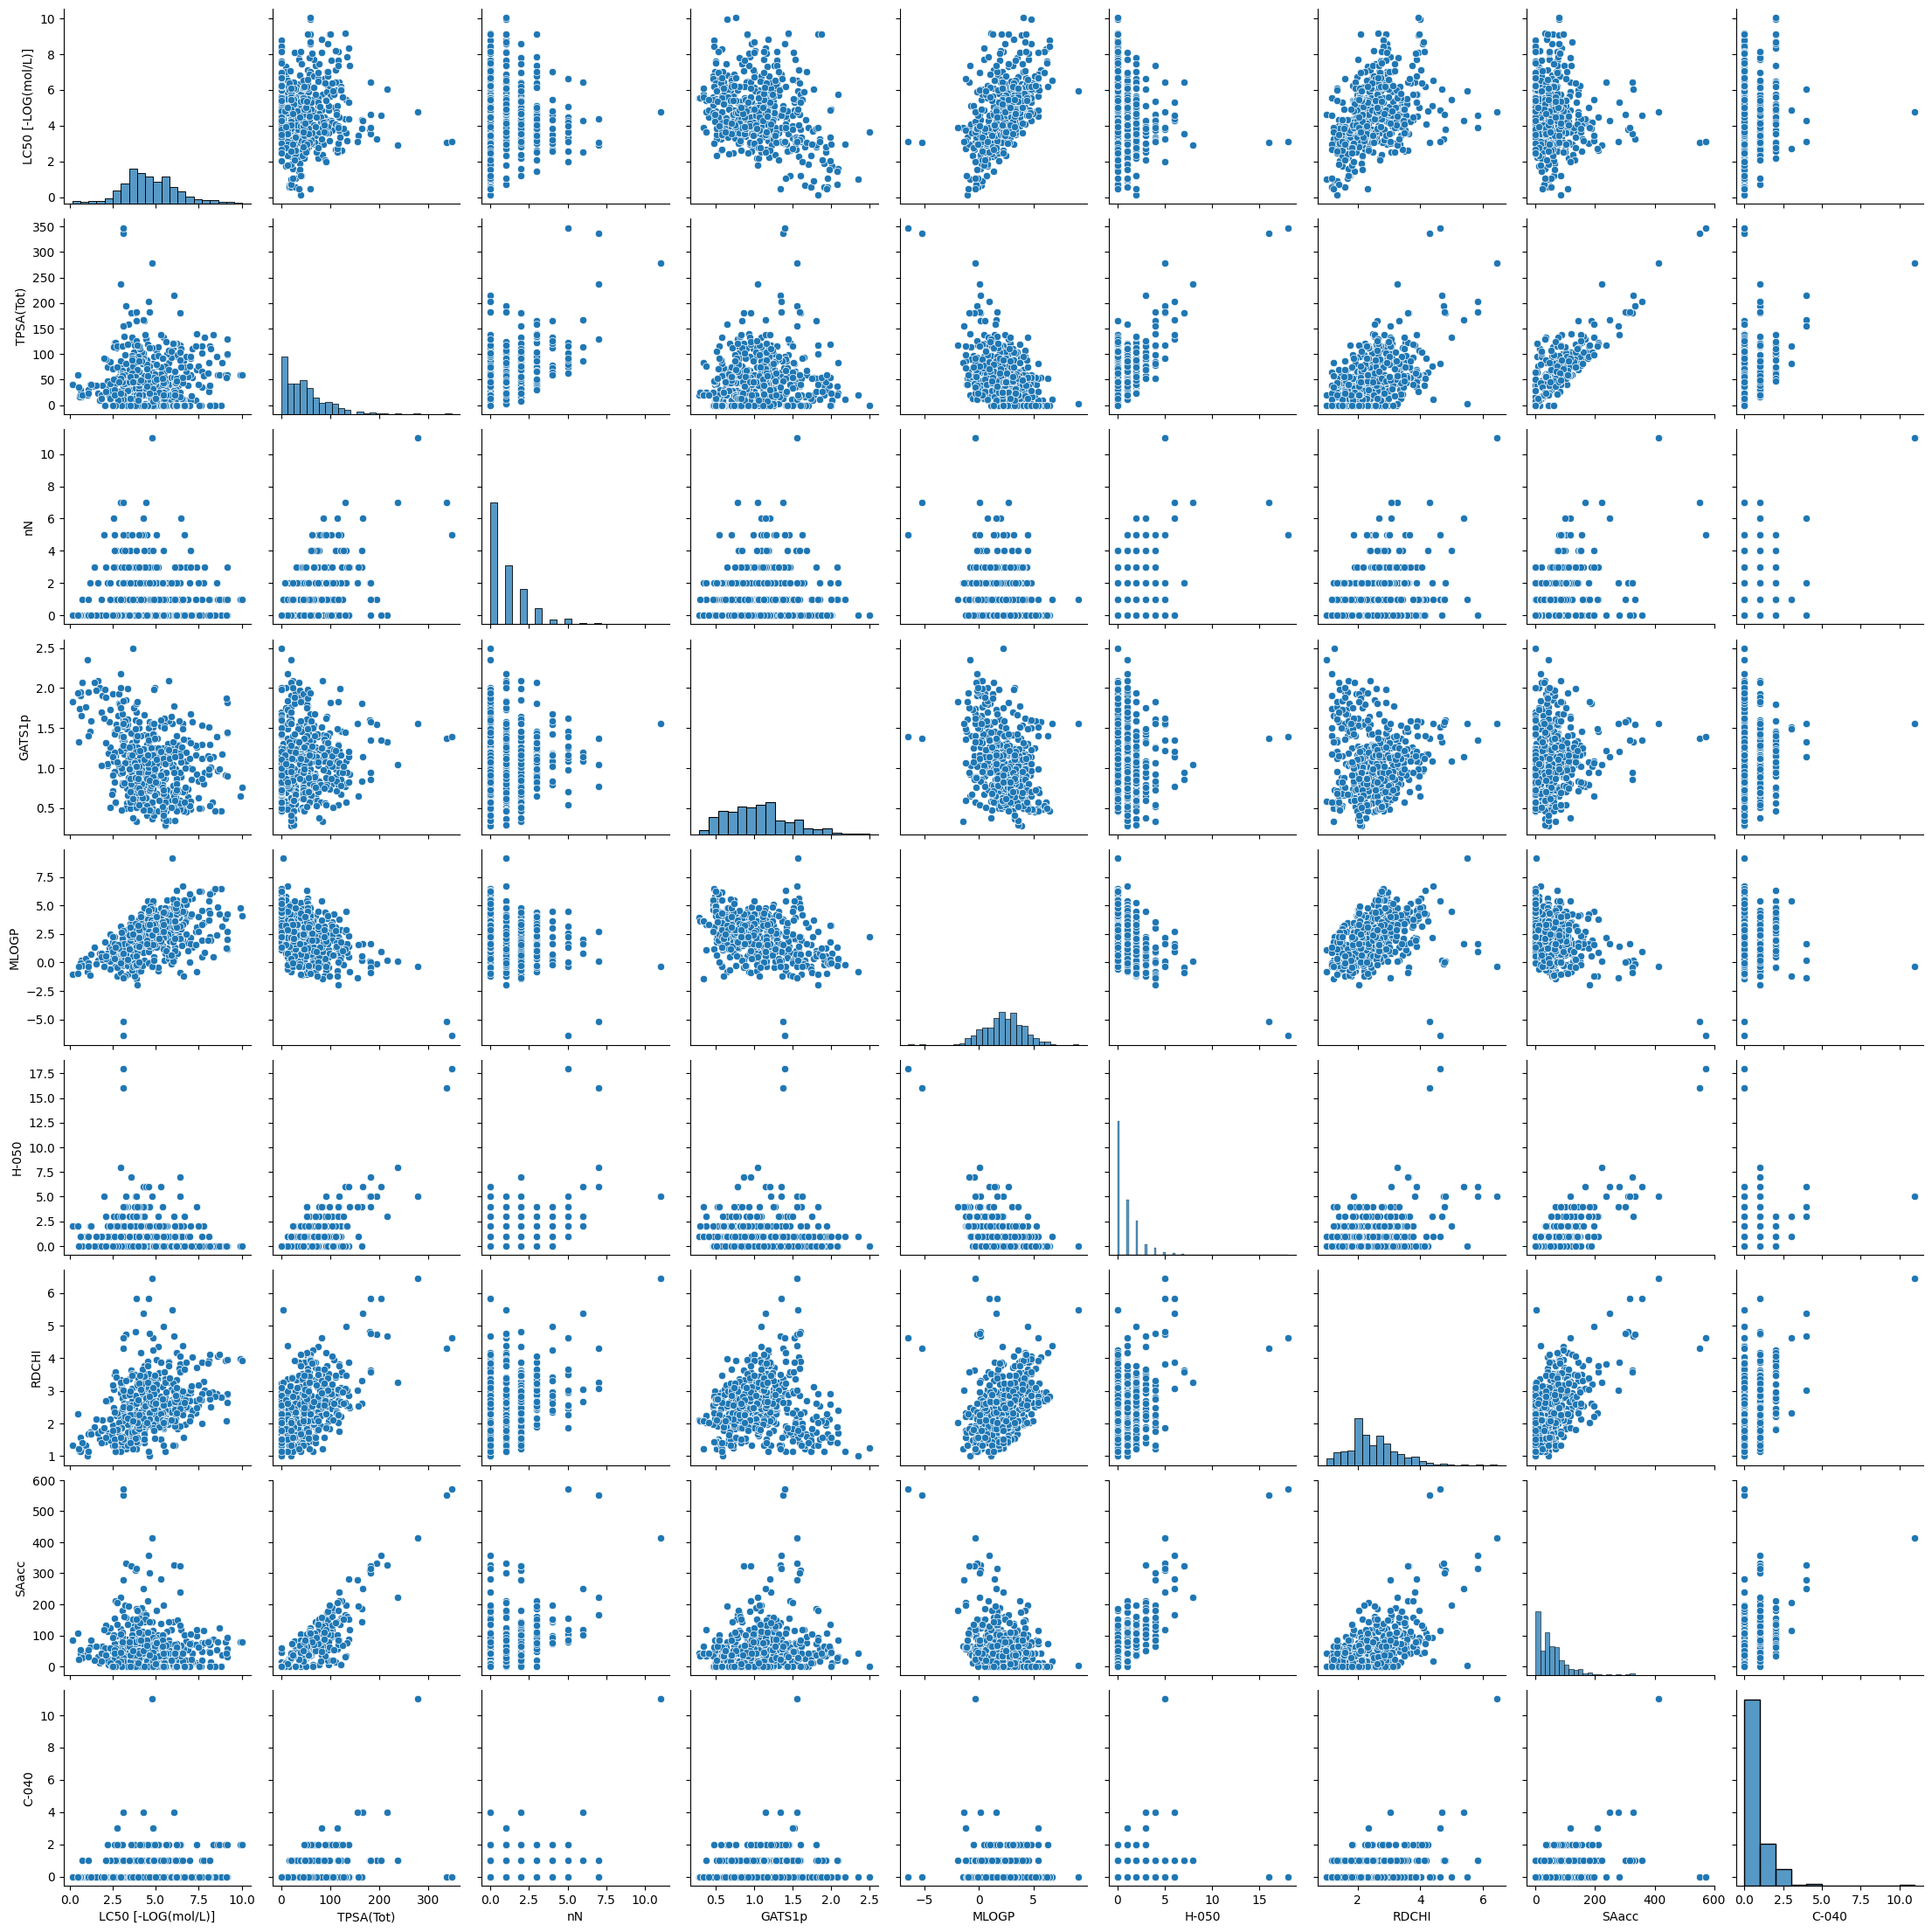

In [204]:
random_features = np.random.choice(df.columns, 9, replace=False)
random_data = df[random_features]

sns.pairplot(random_data)
plt.show()

Histogramas de las variables para visualizar la distribución de frecuencia de los valores.

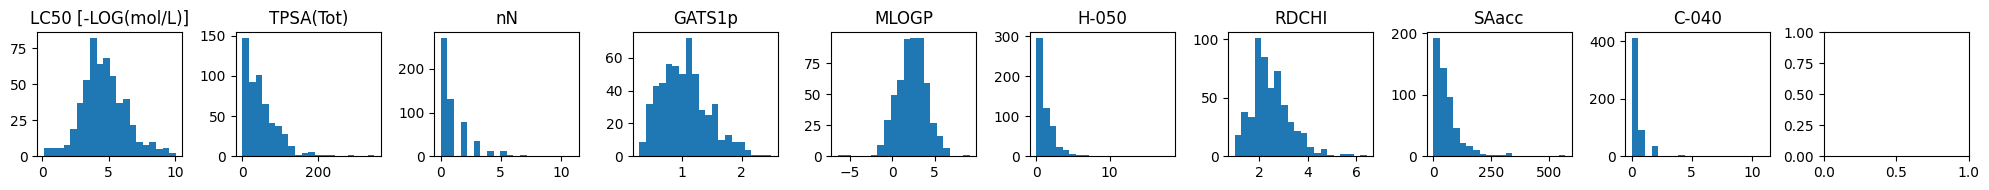

In [205]:
fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i, col in enumerate(random_data.columns):
    axs[i].hist(random_data[col], bins=20)
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

Algunas variables siguen una distribución normal.

#Preprocesamiento de datos

**Normalización de la data con RobustScaler**

RobustScaler utiliza la mediana y el rango intercuartil (IQR) para escalar los datos. Esto lo hace menos sensible a los valores atípicos en el conjunto de datos.

In [206]:
#Definimos nuestras variables X y Y
x = df.drop("LC50 [-LOG(mol/L)]", axis=1) #características
y = df["LC50 [-LOG(mol/L)]"] #outcome

In [207]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040
0,-0.744434,-0.639666,0.0,0.168436,-1.005330,-0.733962,-0.5,0.0
1,-0.574609,-0.474815,0.0,1.627134,0.624733,-1.009434,-0.5,0.0
2,-0.574609,-0.474815,0.0,1.467467,0.578891,-0.992453,-0.5,0.0
3,-0.574609,-0.474815,0.0,0.828334,0.441365,-0.615094,-0.5,0.0
4,3.217663,4.270325,3.0,-0.961698,2.487207,0.588679,-0.5,4.0
...,...,...,...,...,...,...,...,...
540,-0.301748,-0.103511,2.0,0.485925,0.525586,-0.324528,0.5,0.0
541,-0.574609,-0.474815,0.0,0.462390,0.408316,-0.277358,-0.5,0.0
542,-0.744434,-0.639666,0.0,1.334564,0.817697,-0.545283,-0.5,0.0
543,-0.502668,-0.497190,0.0,0.270420,0.287846,-0.366038,-0.5,0.0


**Verificamos presencia de outliers despues de normalización**

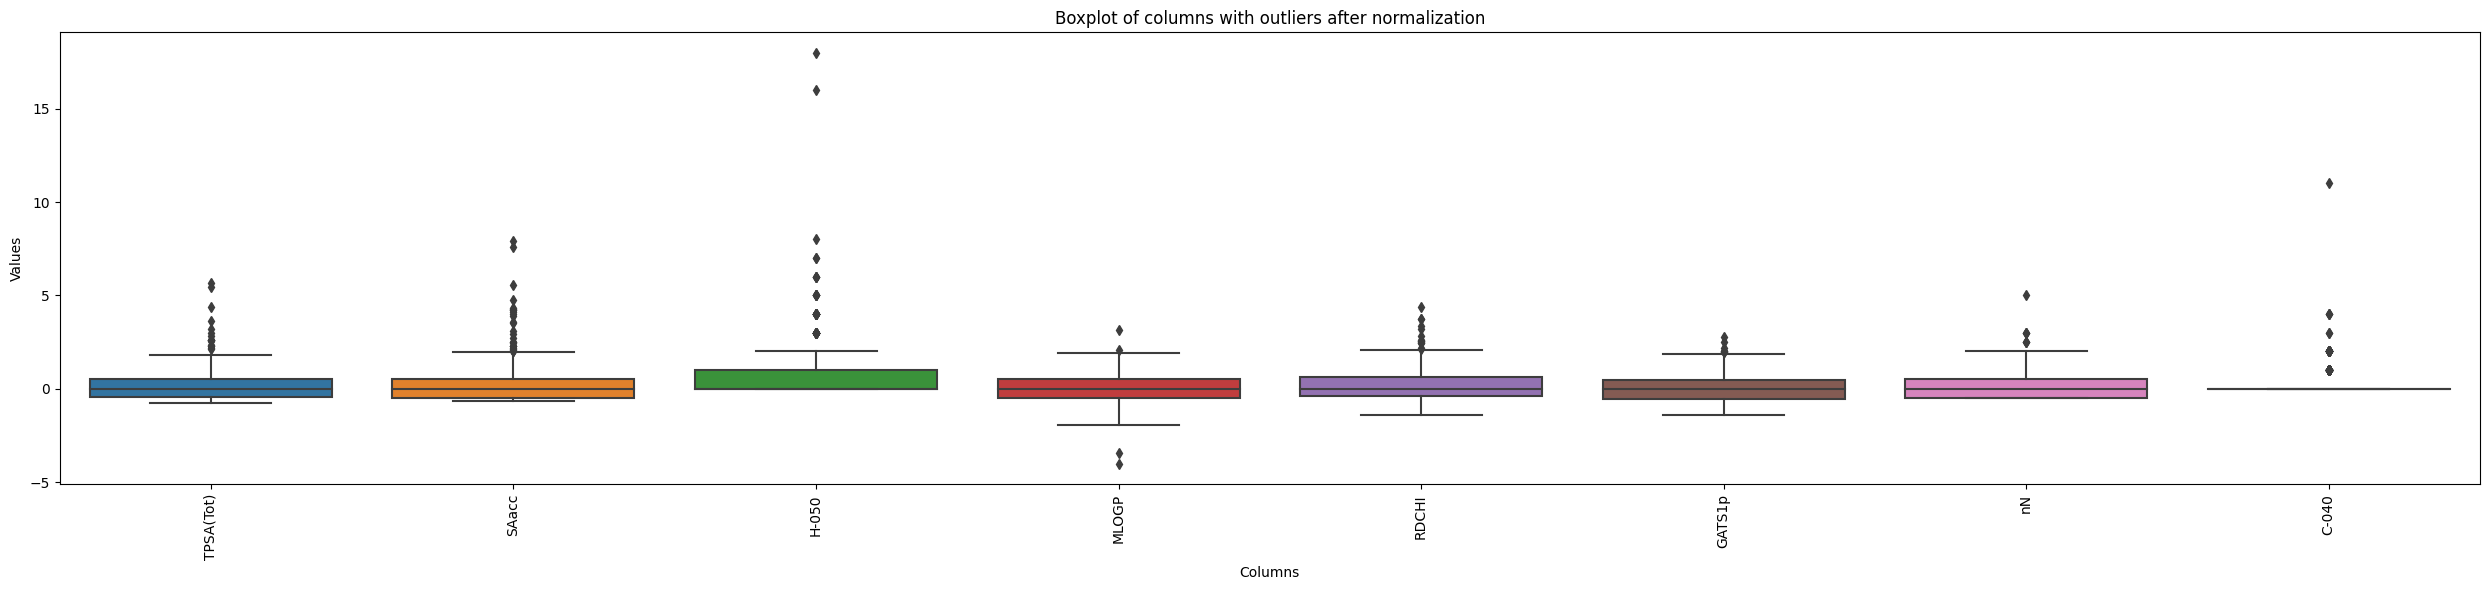

In [208]:
z_scores = x_scaled.apply(lambda x: (x - x.mean()) / x.std())
outliers = (z_scores.abs() > 3).sum() # threshold = 3
outliers_cols = outliers[outliers > 0]


outliers_cols = outliers[outliers > 0].index.tolist()

df_outliers = x_scaled[outliers_cols]

fig, ax = plt.subplots(figsize=(25, 6))
sns.boxplot(data=df_outliers, ax=ax, orient='v')

ax.set_title("Boxplot of columns with outliers after normalization")
ax.set_xlabel("Columns")
ax.set_ylabel("Values")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Aún se observa la presencia de algunos valores atípicos, es comprensible debido a que RobustScaler no elimina todos los valores atípicos, sino que los minimiza en su impacto en los datos. 

**Selección de características por relevancia**

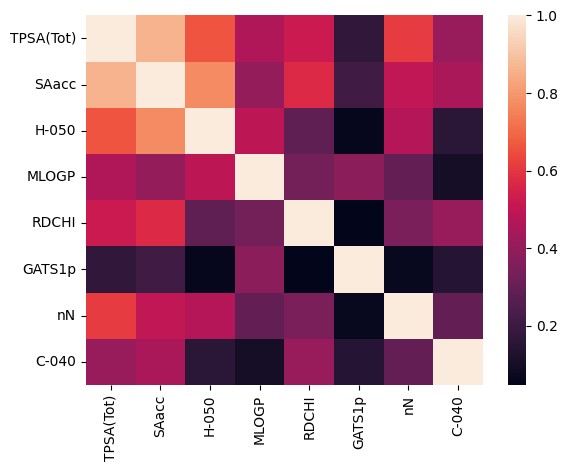

In [209]:
# Calculamos una matriz de correlación 
corr_matrix = x_scaled.corr().abs()
sns.heatmap(corr_matrix)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] #identificamos variables que tienen una correlación superior a un valor de corte de 0.8

x_sel  = x_scaled.drop(to_drop, axis=1) #eliminamos las variables que tienen una correlación superior a un valor de corte de 0.8

In [210]:
x_sel.columns

Index(['TPSA(Tot)', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040'], dtype='object')

Se eliminó una columna "SAacc"(Molecular properties) ya que no era relevante.

#Modelos

**Evaluación de los modelos**

Se evaluará con las siguientes métricas:
* El MSE mide la cantidad promedio de error cuadrático entre los valores reales y los valores predichos por el modelo.

* R² es una medida estadística que indica la proporción de la varianza total de la variable de respuesta (y). El valor de R² varía entre 0 y 1, y cuanto más cercano sea a 1, mejor será la capacidad del modelo para explicar la varianza en los datos.

**Librerías**

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [212]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

##Regresión lineal

In [213]:
# Creamos el objeto de Regresión Linear
lin_regr = LinearRegression()
 
# Entrenamos nuestro modelo
lin_regr.fit(X_train, y_train)
 
# Hacemos las predicciones
y_pred = lin_regr.predict(X_test)

#Evaluamos el modelo
## Error Cuadrado Medio
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
## Puntaje de Varianza.
print('Variance score (R²): %.2f' % r2_score(y_test, y_pred))

Mean squared error (MSE): 1.12
Variance score (R²): 0.52


**Optimización de hiperparámetros**

En el caso de un modelo de regresión lineal, los hiperparámetros más importantes son:

* Intercepción (fit_intercept): Este parámetro permite que el modelo ajuste una intercepción en la regresión. Es importante para asegurar que la línea de regresión pase por el origen.

* Regularización (penalty): La regularización se utiliza para evitar el sobreajuste en el modelo de regresión. Hay dos tipos principales de regularización: L1 (Lasso) y L2 (Ridge). L1 reduce los coeficientes menos importantes a cero, mientras que L2 penaliza los coeficientes grandes.

* Alpha (alpha): Este parámetro controla la fuerza de la regularización. Un valor más alto de alpha aumenta la penalización y, por lo tanto, reduce la complejidad del modelo.

* Máximo número de iteraciones (max_iter): El número máximo de iteraciones que se utilizarán para converger en la solución. Si la solución no converge después de este número de iteraciones, el modelo emitirá una advertencia.

* Método de solución (solver): Este parámetro especifica el método utilizado para calcular los coeficientes de regresión. Los valores comunes incluyen "svd", "cholesky", "lsqr" y "sag".

* Tolerancia (tol): Este parámetro especifica el nivel de tolerancia para la convergencia del algoritmo de optimización. Un valor más bajo de tolerancia conduce a una mayor precisión pero aumenta el tiempo de cálculo.

In [214]:
# Creación del estimador: Modelo
model = lin_regr

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {'copy_X': [True, False],
              'fit_intercept': [True, False],
              'n_jobs': [-1, 1, 2],
              'positive': [True, False]}

# Realizar la búsqueda en cuadrícula con validación cruzada de 5 pliegues
grid_search = GridSearchCV(model, param_grid, cv=5)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los hiperparámetros óptimos, el MSE promedio en la validación cruzada y el accuracy r^2
print("Mejores hiperparámetros:", grid_search.best_params_)
print("MSE promedio:", np.abs(grid_search.best_score_))
print("R^2:", grid_search.best_score_)

# Entrenar el modelo con los hiperparámetros óptimos
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predecir los resultados
y_pred = best_model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE del modelo:", mse)

r2 = r2_score(y_test, y_pred)
print("El R^2 del modelo es:", r2)

Mejores hiperparámetros: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
MSE promedio: 0.4520580917236507
R^2: 0.4520580917236507
MSE del modelo: 1.124025264205908
El R^2 del modelo es: 0.5237993039894329


## Random Forest Regressor

In [215]:
# Creamos el objeto de Random Forest Regressor
RF_regr = RandomForestRegressor(n_estimators=100, random_state=42)
 
# Entrenamos el modelo
RF_regr.fit(X_train, y_train)

#Hacemos las predicciones
y_pred = RF_regr.predict(X_test)

#Evaluamos el modelo
## Error Cuadrado Medio
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
## Puntaje de Varianza.
print('Variance score (R²): %.2f' % r2_score(y_test, y_pred))


Mean squared error (MSE): 1.02
Variance score (R²): 0.57


**Optimización de hiperparámetros**

Algunos de los hiperparámetros más importantes de RandomForestRegressor son:

* n_estimators: el número de árboles en el bosque.
* max_depth: la profundidad máxima de cada árbol.
* min_samples_split: el número mínimo de muestras requeridas para dividir un nodo interno.
* min_samples_leaf: el número mínimo de muestras requeridas en cada hoja del árbol.
* max_features: el número máximo de características a considerar al buscar la mejor división.
* bootstrap: si se deben realizar muestreos de arranque cuando se construyen los árboles.

In [216]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['squared_error', 'absolute_error']
}
model = RF_regr
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

# Imprimir los hiperparámetros óptimos, el MSE promedio en la validación cruzada y el accuracy r^2
print("Mejores hiperparámetros:", grid_search.best_params_)
print("MSE promedio:", np.abs(grid_search.best_score_))
print("R^2:", grid_search.best_score_)

# Entrenar el modelo con los hiperparámetros óptimos
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predecir los resultados
y_pred = best_model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE del modelo:", mse)

r2 = r2_score(y_test, y_pred)
print("El R^2 del modelo es:", r2)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mejores hiperparámetros: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}
MSE promedio: 0.516657011060226
R^2: 0.516657011060226
MSE del modelo: 0.9988694958085572
El R^2 del modelo es: 0.5768223684333277
